# debug_risser

In [1]:
import os
import random
import gdcm

import numpy as np
import pandas as pd
import pydicom as dicom
import matplotlib.pyplot as plt

In [6]:
data_orig = '../data/harms'
sites = os.listdir(data_orig)
print(sites)

['DEL pre&1yr', 'STL pre&1yr', 'PHI pre&1yr', 'CMC pre&1yr', 'PHC pre&1yr', 'MSJ pre&1yr', 'BOS pre&1yr']


In [30]:
# dict with keys as 3-letter location ID's and entries as case folders
cases = {}
total_num_cases = 0
for site in sites:
    prefix = site.split()[0]
    sitedir = os.path.join(data_orig, site)
    filenames = os.listdir(sitedir)
    cases_iter = []
    # make format uniform for pre/1year labels
#     for filename in filenames:
        # loremipsum
    
    random.shuffle(cases_iter)  # shuffle!
    total_num_cases += len(cases_iter)
    cases[prefix] = cases_iter
    
print(total_num_cases, 'total cases')

720 total cases


In [31]:
# make num of train, val, test directories

val_num = int(np.ceil(total_num_cases * 0.1))
test_num = int(np.ceil(total_num_cases * 0.2))
train_num = total_num_cases - val_num - test_num
print('train:',train_num,'val:',val_num,'test:',test_num)

train: 504 val: 72 test: 144


### look at no hand sample

In [4]:
idir = '../data/harms/DEL pre&1yr/DELAISY0641-AZ (PREOP) (No hand)'

In [9]:
ifiles = os.listdir(idir)
print(ifiles)

['DE641.preop0001^Patient_000002_DX_PROFIL.dcm', 'DE641.PREOP0001^PATIENT_000001_DX_FACE_132025088461735708_SC.dcm', 'DE641.preop0001^Patient_000001_DX_FACE.dcm', 'DE641.preop0001^Patient_sterEOS_Excel_Report17052019_1008_36.xlsx']


showing ../data/harms/DEL pre&1yr/DELAISY0641-AZ (PREOP) (No hand)/DE641.preop0001^Patient_000002_DX_PROFIL.dcm
(3901, 1764)


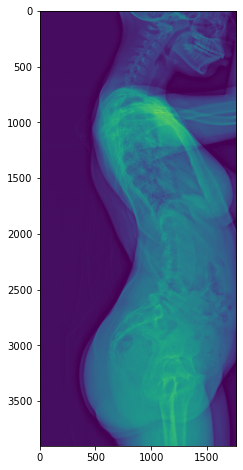

showing ../data/harms/DEL pre&1yr/DELAISY0641-AZ (PREOP) (No hand)/DE641.PREOP0001^PATIENT_000001_DX_FACE_132025088461735708_SC.dcm
(1272, 2290)


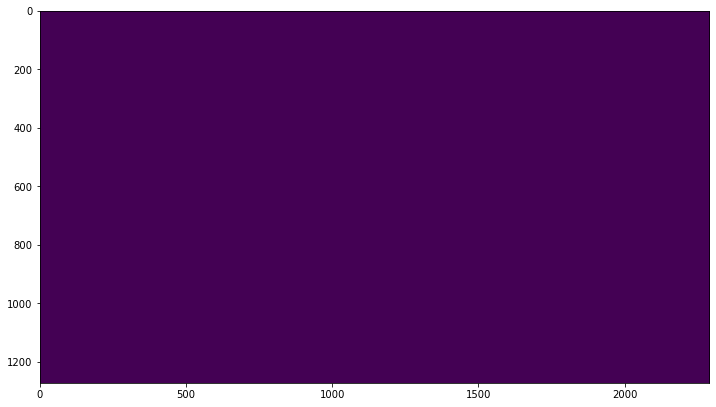

showing ../data/harms/DEL pre&1yr/DELAISY0641-AZ (PREOP) (No hand)/DE641.preop0001^Patient_000001_DX_FACE.dcm
(3901, 2280)


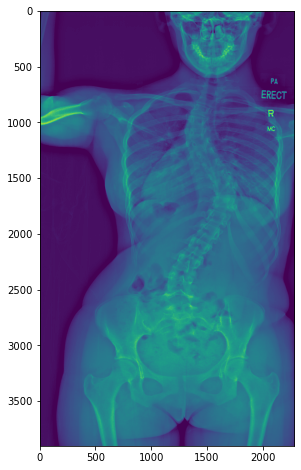

In [22]:
for ifile in ifiles:
    if not ifile.endswith('.dcm'):
        continue
    filepath = os.path.join(idir, ifile)
    print('showing',filepath)
    raw = dicom.read_file(filepath)
    img = raw.pixel_array.astype(np.int32)
    print(np.shape(img))
    plt.figure(figsize=(12,8))
    plt.imshow(img)
    plt.show()

### look at normal sample

In [2]:
idir = '../data/harms/BOS pre&1yr/BOSAISY0002-JM (1yr)'

In [3]:
ifiles = os.listdir(idir)
print(ifiles)

['BOSAISY0002-JM_080417_pa.dcm', 'BOSAISY0002-JM_1Y.dcm', 'BOSAISY0002-JM_1Y.xlsx', 'recon.xml', 'BOSAISY0002-JM_1Y_RevisedReport.xlsx', 'BOSAISY0002-JM_080417_lat.dcm']


showing ../data/harms/BOS pre&1yr/BOSAISY0002-JM (1yr)/BOSAISY0002-JM_080417_pa.dcm
(4375, 1896)


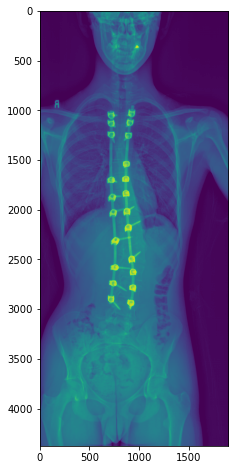

showing ../data/harms/BOS pre&1yr/BOSAISY0002-JM (1yr)/BOSAISY0002-JM_1Y.dcm
(1272, 2290)


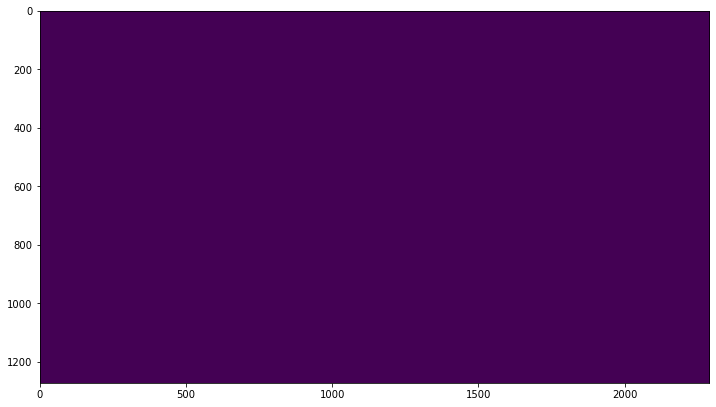

showing ../data/harms/BOS pre&1yr/BOSAISY0002-JM (1yr)/BOSAISY0002-JM_080417_lat.dcm
(4375, 1764)


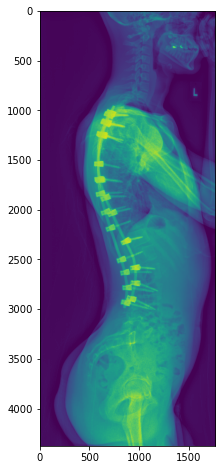

In [4]:
for ifile in ifiles:
    if not ifile.endswith('.dcm'):
        continue
    filepath = os.path.join(idir, ifile)
    print('showing',filepath)
    raw = dicom.read_file(filepath)
    img = raw.pixel_array.astype(np.int32)
    print(np.shape(img))
    plt.figure(figsize=(12,8))
    plt.imshow(img)
    plt.show()

In [31]:
gdcm

<module 'gdcm' from '/home-2/jwei9@jhu.edu/.conda/envs/arcade/lib/python3.8/site-packages/gdcm.py'>